<a href="https://colab.research.google.com/github/Bartol02/Data_analysis/blob/main/WineDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
wine = pd.read_csv('/content/drive/MyDrive/DataToAnalyse/WineQT.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


I have wine dataset on my google drive

In [ ]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


All numerical data and no empty spaces to fill in so our job is a bit easier

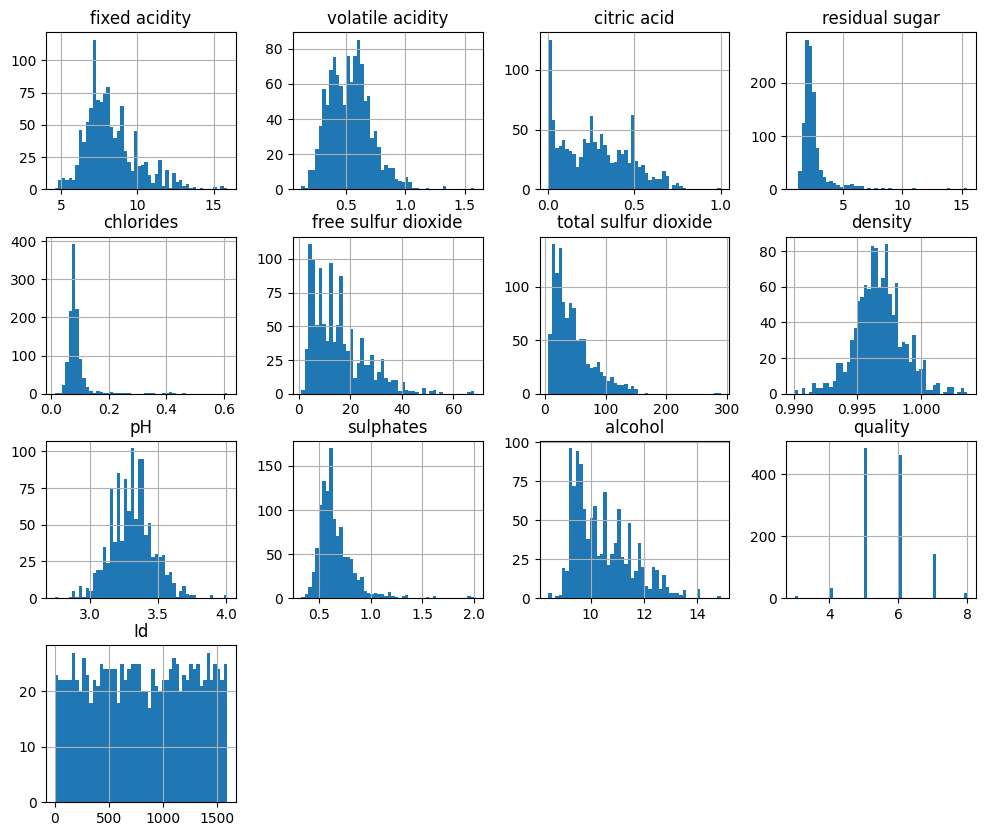

In [ ]:
import matplotlib.pyplot as plt

wine.hist(bins=50, figsize=(12,10))
plt.show()

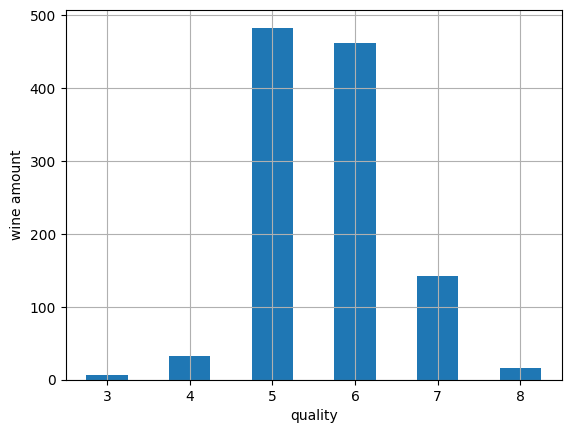

In [ ]:
wine["quality"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("quality")
plt.ylabel("wine amount")
plt.show()

Quality data is unbalanced a lot of avarage samples and small amount of outliers (3, 4 and 8 quality score)  

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(wine, test_size=0.2, stratify=wine["quality"])

We don't want purely random split as it may result in having noo 3, 4 or 8 quality wines in test/train set so we shall stratify it

Let's check it we have good splits

In [ ]:
test_set["quality"].value_counts() / len(test_set)

5    0.423581
6    0.401747
7    0.126638
4    0.030568
8    0.013100
3    0.004367
Name: quality, dtype: float64

In [ ]:
train_set["quality"].value_counts() / len(train_set)

5    0.422319
6    0.404814
7    0.124726
4    0.028446
8    0.014223
3    0.005470
Name: quality, dtype: float64

In [ ]:
X_train = train_set.drop("quality", axis=1)
X_test = test_set.drop("quality", axis=1)
y_train = train_set["quality"].copy()
y_test = test_set["quality"].copy()

In [ ]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
494,7.0,0.65,0.02,2.1,0.066,8.0,25.0,0.99720,3.47,0.67,9.5,697
136,8.2,0.50,0.35,2.9,0.077,21.0,127.0,0.99760,3.23,0.62,9.4,190
18,6.3,0.39,0.16,1.4,0.080,11.0,23.0,0.99550,3.34,0.56,9.3,25
1126,7.5,0.52,0.40,2.2,0.060,12.0,20.0,0.99474,3.26,0.64,11.8,1575
158,6.8,0.61,0.04,1.5,0.057,5.0,10.0,0.99525,3.42,0.60,9.5,222


In [ ]:
X_train = X_train.drop("Id", axis=1)
X_test = X_test.drop("Id", axis=1)

In [ ]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
494,7.0,0.65,0.02,2.1,0.066,8.0,25.0,0.99720,3.47,0.67,9.5
136,8.2,0.50,0.35,2.9,0.077,21.0,127.0,0.99760,3.23,0.62,9.4
18,6.3,0.39,0.16,1.4,0.080,11.0,23.0,0.99550,3.34,0.56,9.3
1126,7.5,0.52,0.40,2.2,0.060,12.0,20.0,0.99474,3.26,0.64,11.8
158,6.8,0.61,0.04,1.5,0.057,5.0,10.0,0.99525,3.42,0.60,9.5


We have a clean data now so let's preprocess it so ML algorithms can work better.  

In [ ]:
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

log_pipeline = make_pipeline (
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler()
    )

In [ ]:
square_pipeline = make_pipeline (
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.square, feature_names_out="one-to-one"),
    StandardScaler()
    )

In [ ]:
std_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaling_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    MinMaxScaler(feature_range=(-1, 1))
)

I imported from my other projects 4 pipelines to Preprocess data:
 log and square for heavy tails (on the right side) also std and minmax for simple scaling (std is less affected by outliers so it should be our go to)

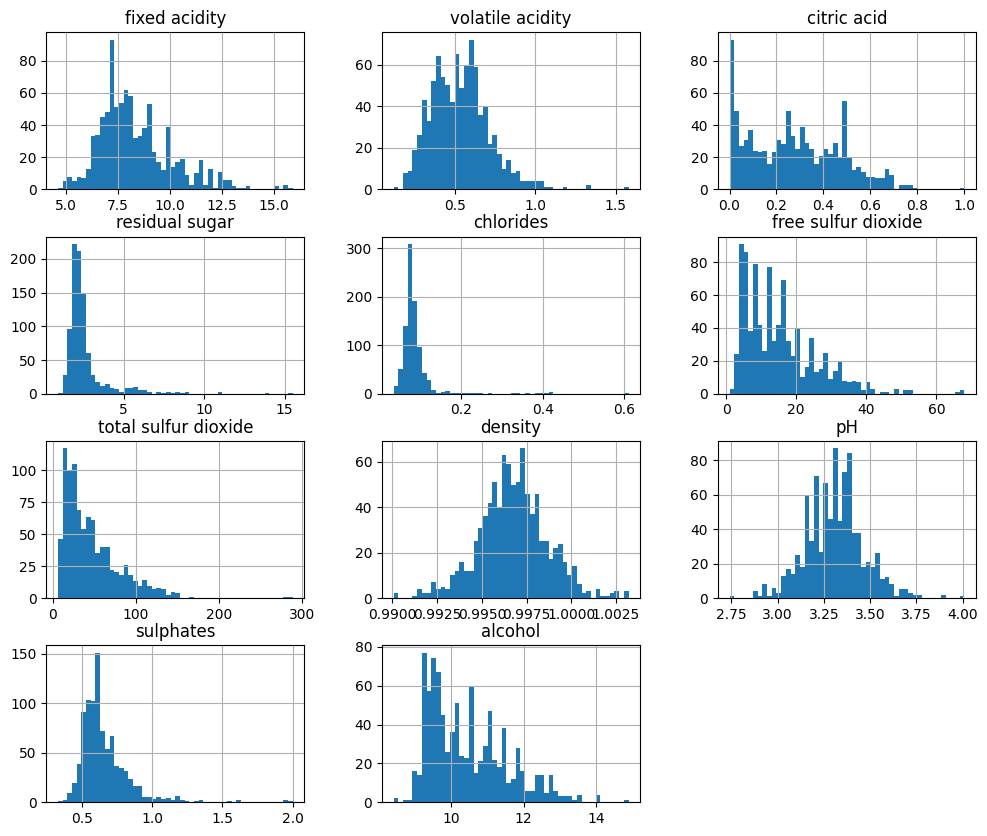

In [ ]:
X_train.hist(bins=50, figsize=(12,10))
plt.show()

Let's look again on distribution of data we see some heavy tails and some look almost like perfect gaussian distribution

In [ ]:
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer([
    ("log", log_pipeline, ["residual sugar", "free sulfur dioxide", "total sulfur dioxide", "alcohol"]),
    ("sqaure", square_pipeline, ["sulphates", "chlorides", "citric acid"]),
    ("std", std_pipeline, ["fixed acidity", "volatile acidity", "density", "pH"]),
  ],
  remainder=std_pipeline)

After some experimentation I've decided to go with preprocessing data in following way:
*   use logarythm pipeline on long right tail data with hight values (all or almost all greater than one)
*   use square pipeline on long right tail data with small values (all or almost all smaller than one)
*   standaries the rest so algorithms will have easier time anylsing data.

In [ ]:
X_prepared = preprocessing.fit_transform(X_train)
X_prepared.shape

(914, 11)

Let's train a few basic models.

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

models = {
    'Logistic Regression': make_pipeline(preprocessing ,LogisticRegression(max_iter=1000)),
    'SVM': make_pipeline(preprocessing ,SVC()),
    'Decision Tree':  make_pipeline(preprocessing ,DecisionTreeClassifier()),
    'Random Forest':  make_pipeline(preprocessing , RandomForestClassifier())
}

accuracy_results = {}
for name, model in models.items():

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy

print(accuracy_results)

{'Logistic Regression': 0.6855895196506551, 'SVM': 0.6986899563318777, 'Decision Tree': 0.5895196506550219, 'Random Forest': 0.7292576419213974}


We can see that random forest is the best even though the results are not great.

In [ ]:
from sklearn.ensemble import VotingClassifier


voting_clf = make_pipeline(preprocessing, VotingClassifier(
    estimators=[
        ('lr', LogisticRegression()),
        ('rf', RandomForestClassifier()),
        ('svc', SVC()),
        ('dt', DecisionTreeClassifier())
    ])
)
voting_clf.voting = "soft"
voting_clf.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)...
                                                  ['sulphates', 'chlorides',
                                                   'citric acid']),
                                                 ('std',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'density', 'pH'])])),
                ('votingclassifier',
                 VotingClassifier(estimators=[('lr', LogisticRegression()),
                                              ('rf', RandomForestClassifier()),
                                              ('svc', SVC()),
                                              ('dt',
                                               DecisionTreeClassifier())]))])

Lastly we can try voting classifier as sometimes it can get that extra few percent boost.

In [ ]:
y_pred_vote = voting_clf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_vote)

0.7074235807860262

Unfortunetally voting classifier doesn't get us any better results than random forest :C

 Results are  not ideal they are at around 70%. This can be due to not  having enough data or that the data is not spread enough. There are very few great wines and even fewer really bad ones. Most are labeled as average.